# Fandango project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('DATA/fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

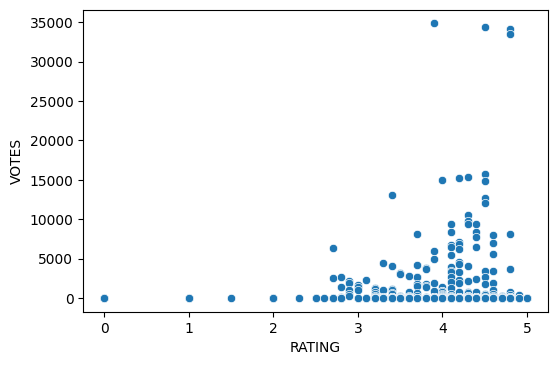

In [7]:
plt.figure(dpi=100)
sns.scatterplot(data=fandango, y='VOTES', x='RATING')

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
title = 'Film Title Name (Year)'
title.split('(')[-1].replace(')', '')

'Year'

In [11]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [12]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

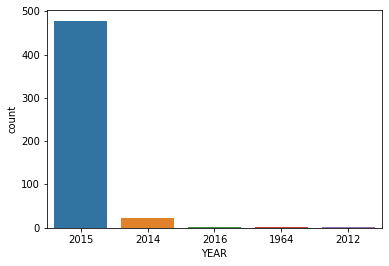

In [13]:
sns.countplot(data=fandango, x='YEAR')

In [14]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [15]:
len(fandango[fandango['VOTES'] == 0])

69

In [16]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

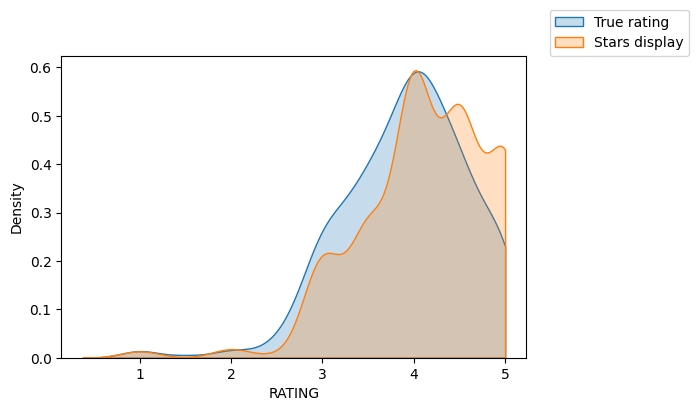

In [18]:
plt.figure(dpi=100)

sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars display')

plt.legend(loc=(1.05, 1))

In [19]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

/var/folders/94/b1tt0kzs1975xbbmjtf99tkc0000gn/T/ipykernel_3431/1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [20]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [21]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

/var/folders/94/b1tt0kzs1975xbbmjtf99tkc0000gn/T/ipykernel_3431/1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [22]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

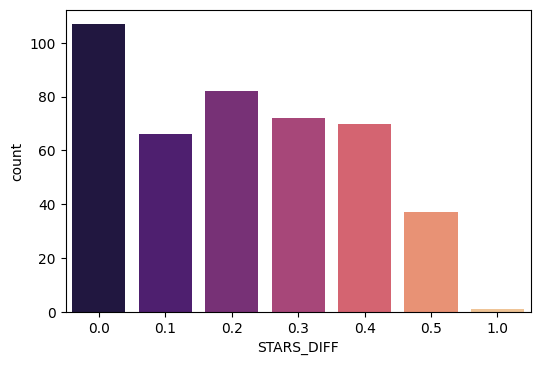

In [24]:
plt.figure(dpi=100)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

In [25]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [26]:
all_sites = pd.read_csv('DATA/all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [27]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [28]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

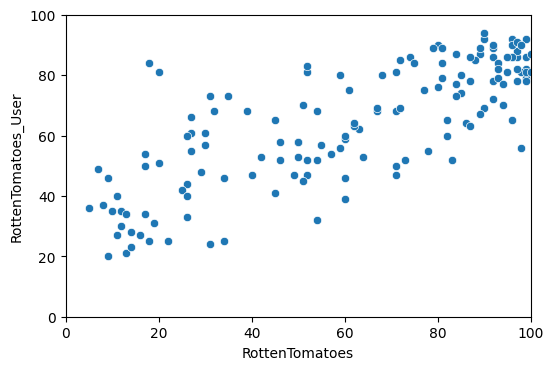

In [31]:
plt.figure(dpi=100)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [32]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [33]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

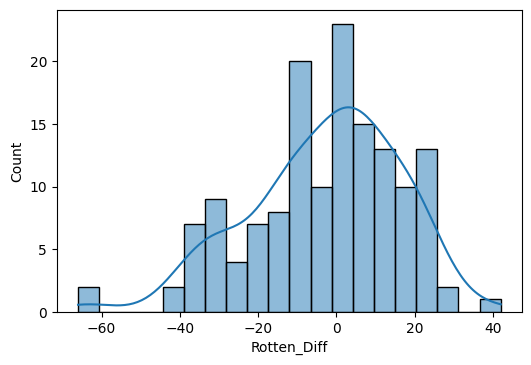

In [35]:
plt.figure(dpi=100)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=20)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

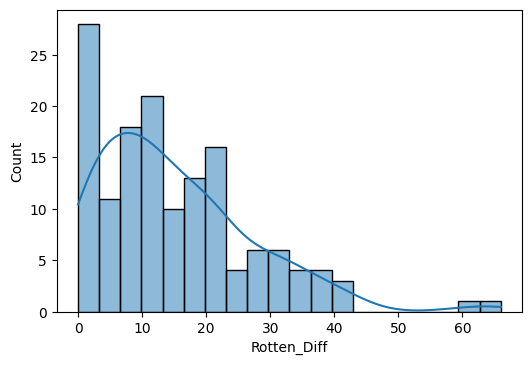

In [36]:
plt.figure(dpi=100)
sns.histplot(data=all_sites, x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=20)

In [38]:
all_sites.nsmallest(5, 'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [39]:
all_sites.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 100.0)

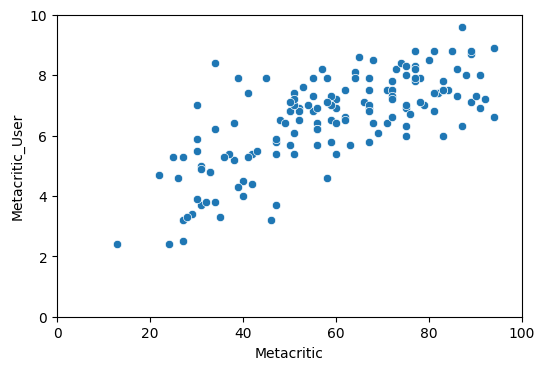

In [40]:
plt.figure(dpi=100)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

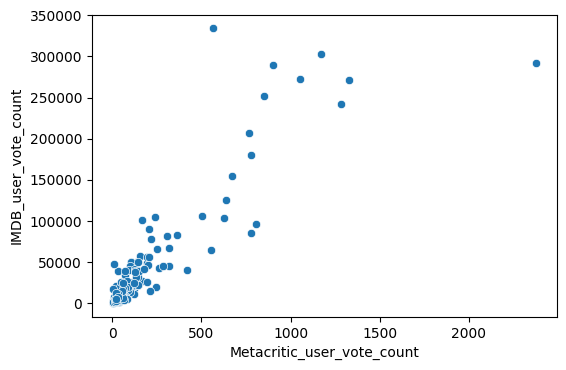

In [41]:
plt.figure(dpi=100)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [42]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [43]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [44]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [45]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [46]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [47]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [50]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

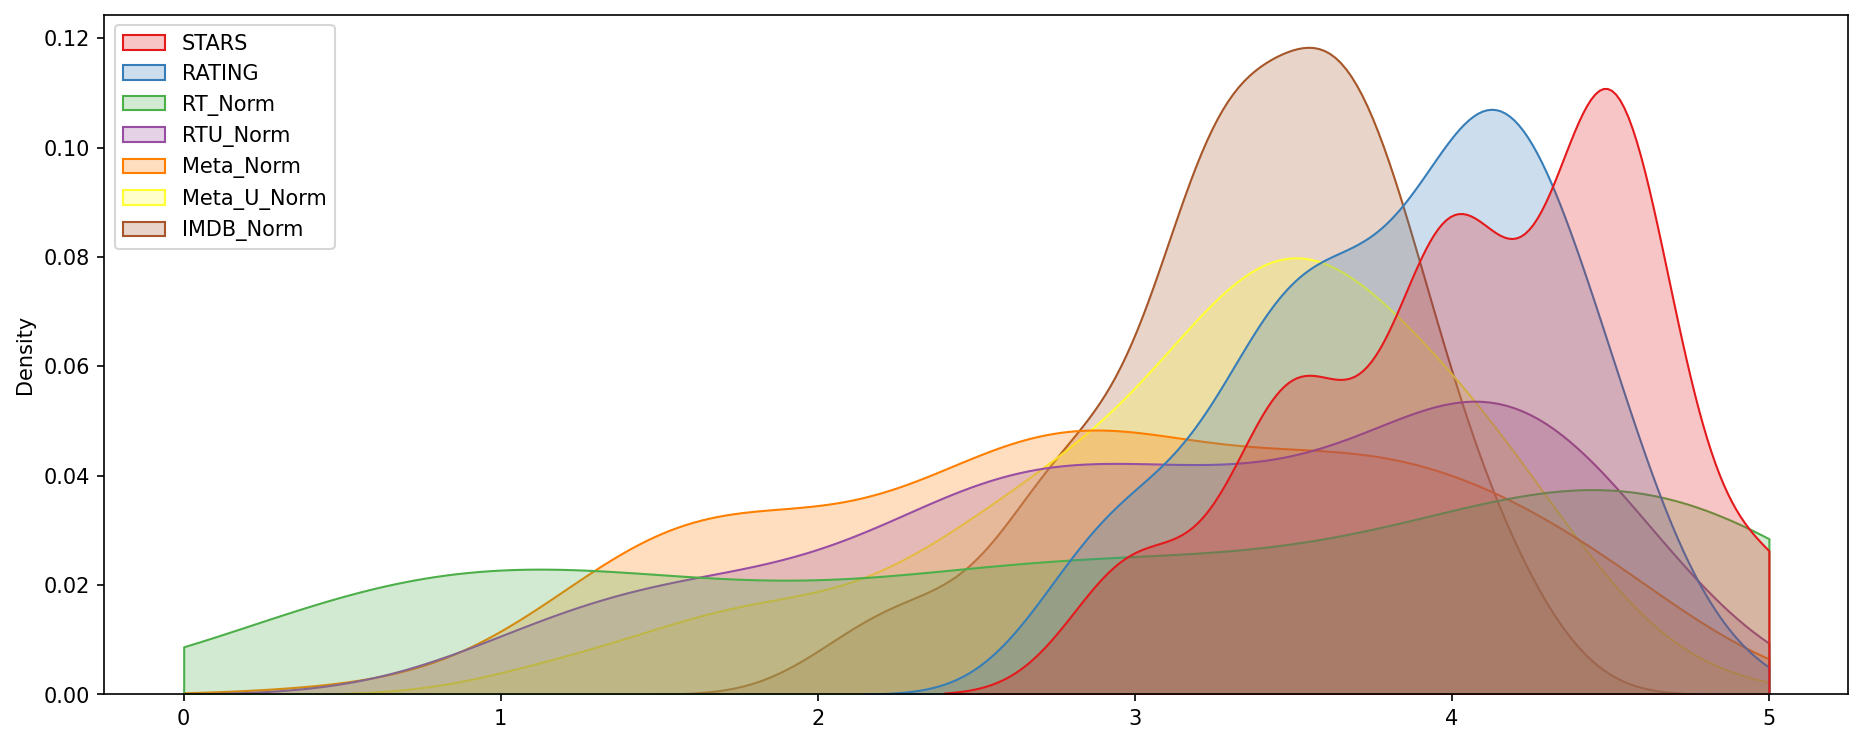

In [54]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1')

move_legend(ax, 'upper left')

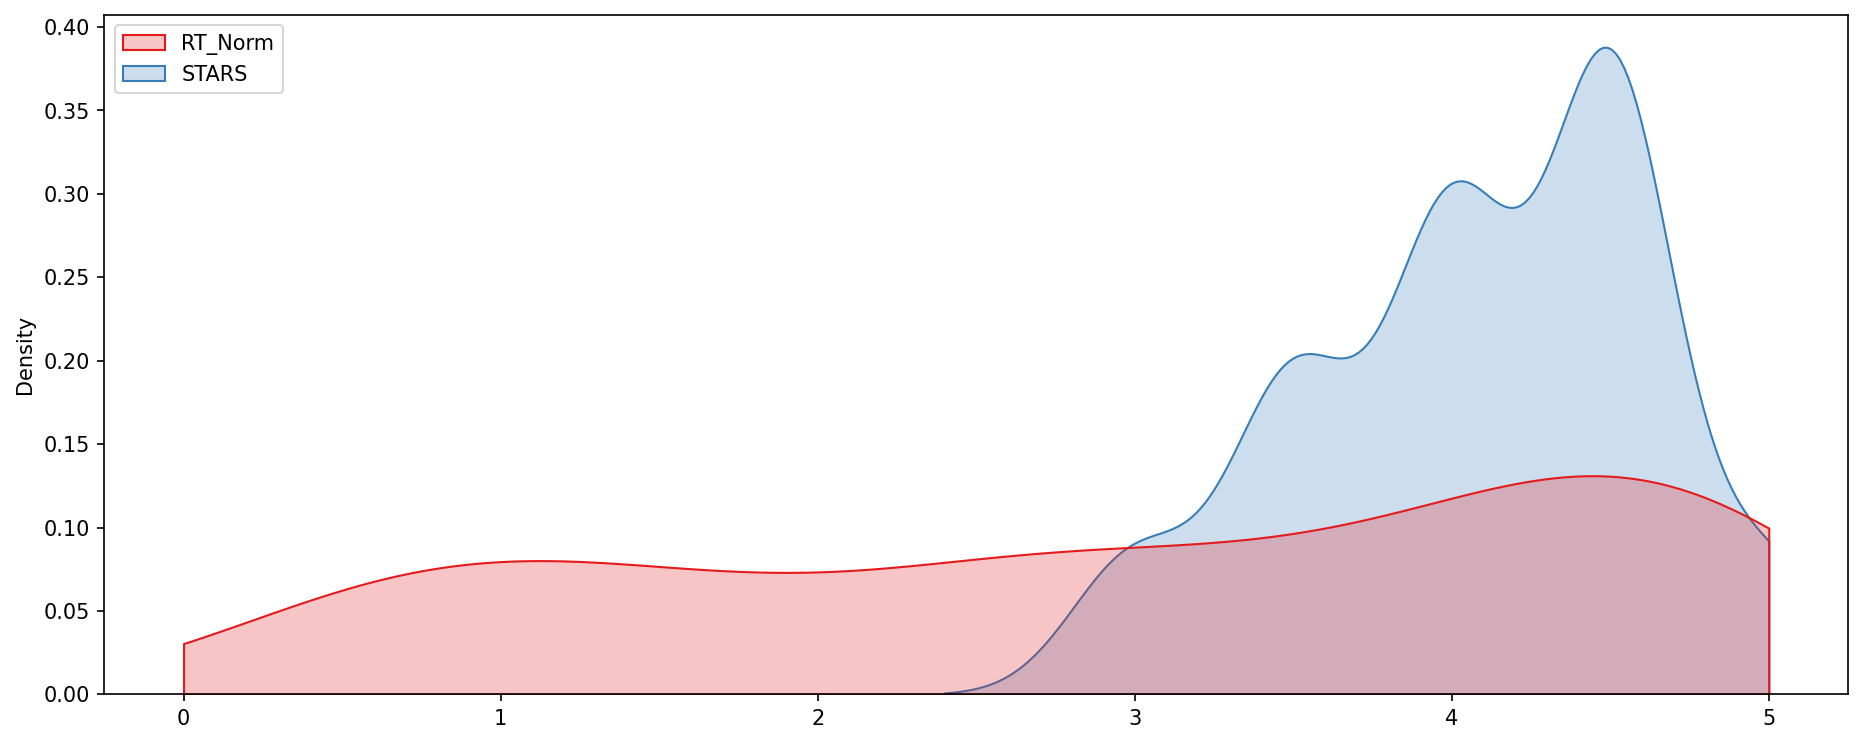

In [55]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1')

move_legend(ax, 'upper left')

<AxesSubplot:ylabel='Count'>

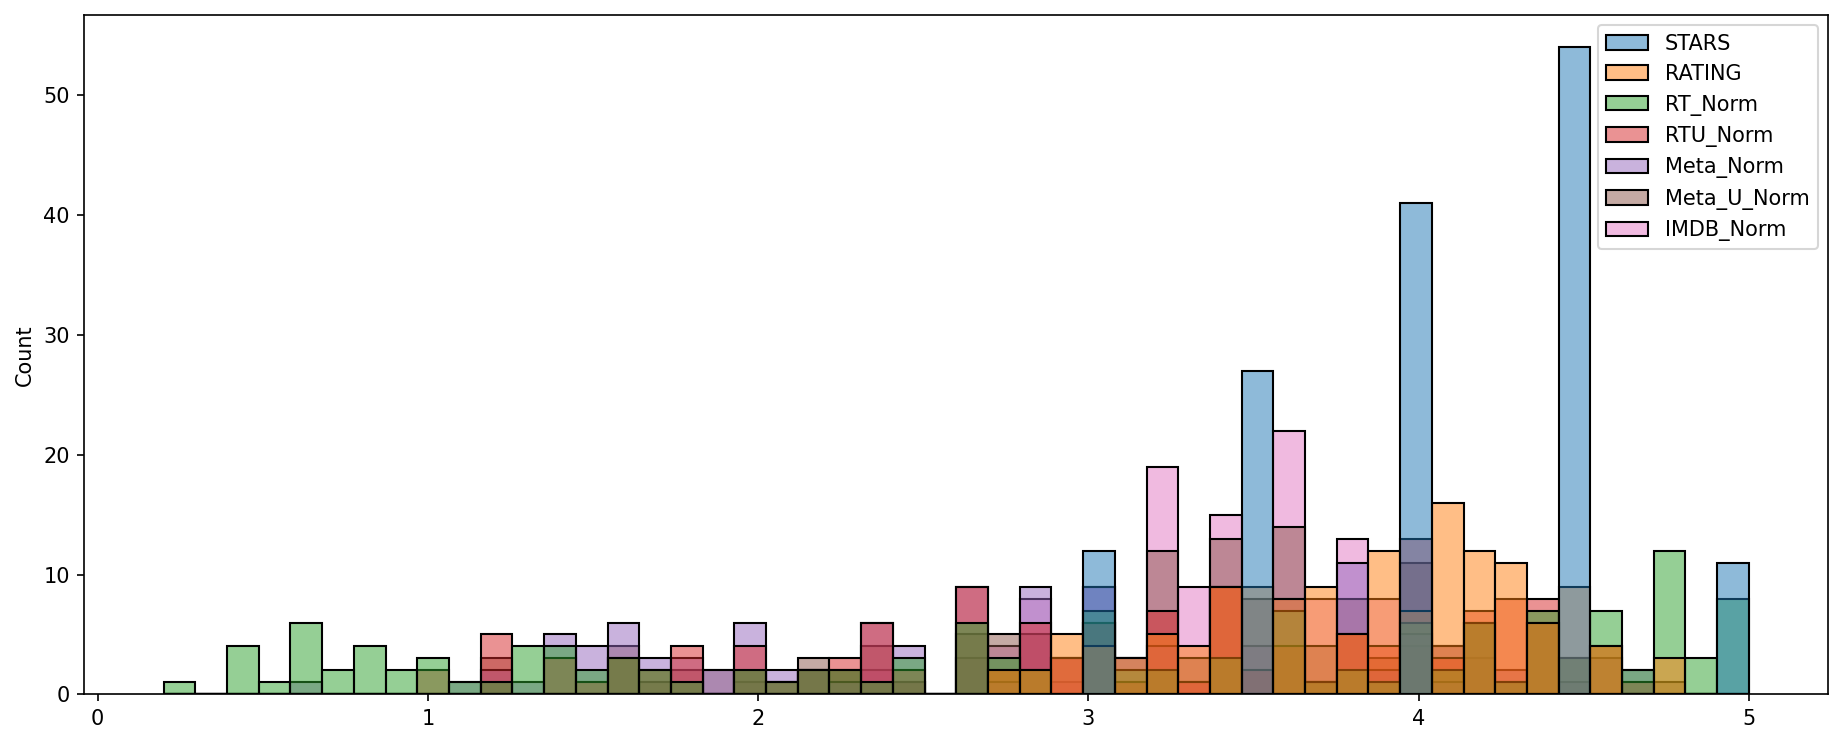

In [58]:
plt.figure(figsize=(15, 6), dpi=150)
sns.histplot(norm_scores, bins=50)

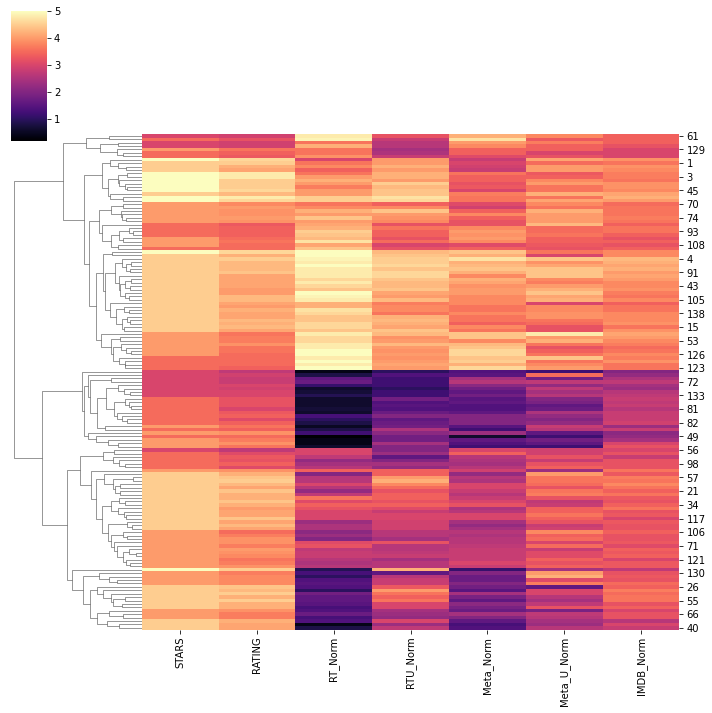

In [60]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

In [62]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_films.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [65]:
worst_movies = norm_films.nsmallest(10, 'RT_Norm')

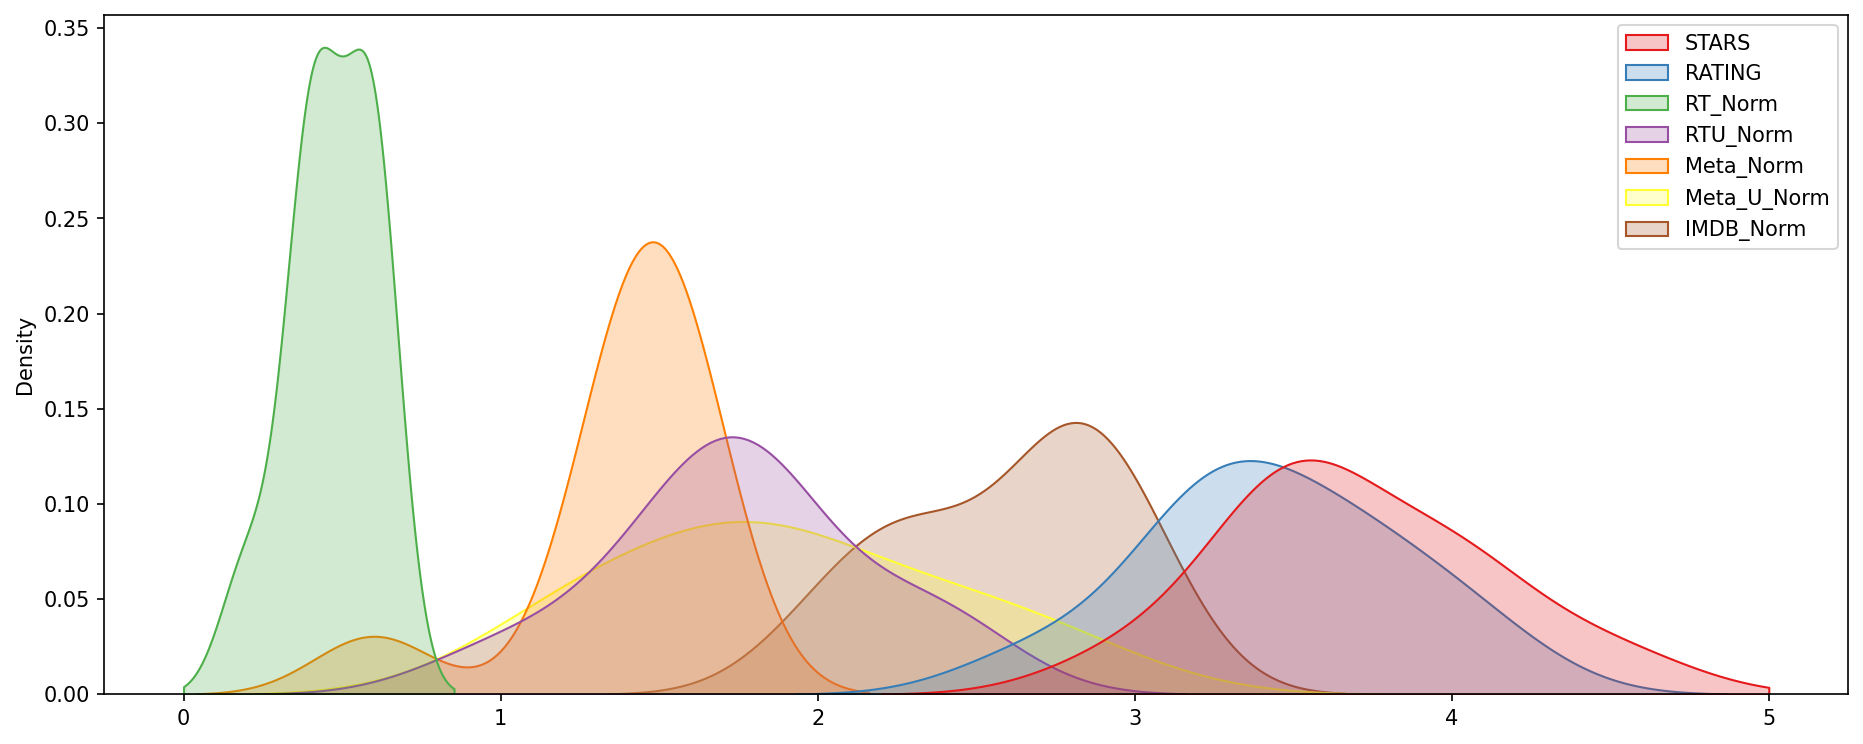

In [68]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=worst_movies, clip=[0,5], shade=True, palette='Set1')
move_legend(ax, "upper right")